In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Квартет Энскомба

In [2]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


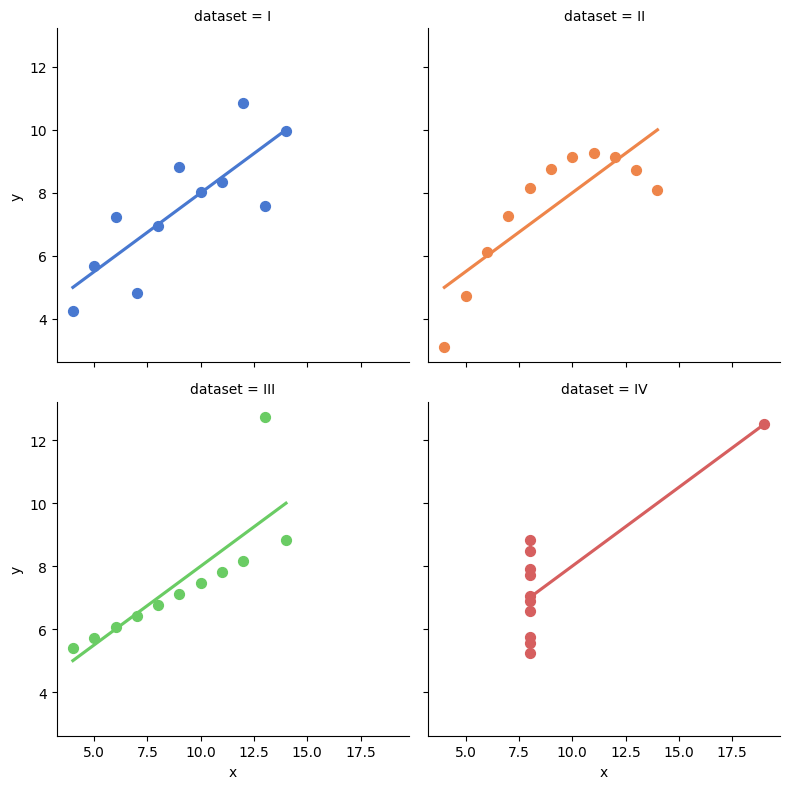

In [3]:
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [4]:
for nmbr in anscombe.dataset.unique():
    print(nmbr)
    df = anscombe[anscombe.dataset == nmbr]
    corr = df.x.corr(df.y, method='pearson')
    print(df.x.mean(), df.x.var(), f'{corr:.4f}')

I
9.0 11.0 0.8164
II
9.0 11.0 0.8162
III
9.0 11.0 0.8163
IV
9.0 11.0 0.8165


In [5]:
for nmbr in anscombe.dataset.unique():
    print(nmbr)
    df = anscombe[anscombe.dataset == nmbr]
    print(f'{df.y.mean():.4f}', f'{df.y.var():.4f}')

I
7.5009 4.1273
II
7.5009 4.1276
III
7.5000 4.1226
IV
7.5009 4.1232


In [6]:
a1 = anscombe[anscombe.dataset == 'I']
a2 = anscombe[anscombe.dataset == 'II']
a3 = anscombe[anscombe.dataset == 'III']
a4 = anscombe[anscombe.dataset == 'IV']

### Задание: обучить линейную регрессию на этих датасетах, сравнить коэффициенты, $R^2$, RMSE и MAE

## Вероятностный подход

In [7]:
import statsmodels.api as sm

In [8]:
X = a3.x.values.reshape(-1, 1)
y = a3.y.values

In [9]:
# X_const = sm.add_constant(X)
X_const = X
model = sm.OLS(y, X_const).fit()
predictions = model.predict(X_const)
model.summary()

/home/work/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Mon, 10 Mar 2025   Prob (F-statistic):                    1.82e-08
Time:                        17:08:17   Log-Likelihood:                         -20.047
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7967      0.050     16.053      0.000       0.686       0.907
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.614
Skew:                          -0.215   Prob(JB):                        0.735
Kurtosis:                       1.925   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model.params

array([0.79667333])

## Выбросы

### Задание: обучить линейную регрессию, Ridge и Lasso на датасете a3

## Ransac (RANdom SAmple Consensus)

In [11]:
from sklearn.linear_model import RANSACRegressor

In [12]:
X = a3.x.values.reshape(-1, 1)
y = a3.y.values
x_array = np.linspace(X.min(), X.max(), 100)

In [13]:
ransac = RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [14]:
y_ransac = ransac.predict(x_array.reshape(-1, 1))

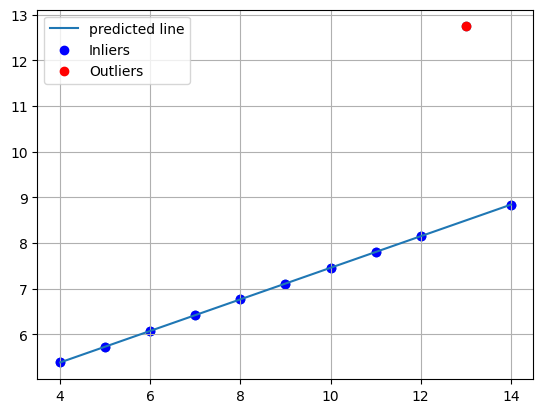

In [15]:
plt.scatter(X.squeeze(), y)
plt.plot(x_array, y_ransac, label='predicted line')
plt.scatter(X[inlier_mask], y[inlier_mask], color="b", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="r", label="Outliers")
plt.grid()
plt.legend()

## Преобразование признаков

In [16]:
def foo_1(x, mean=0, std=1):
    return 2 * x ** 2 + 4 + np.random.normal(mean, std, size=x.shape)

In [17]:
def foo_2(x, mean=0, std=1):
    return np.sin(1 * np.pi * x) - 1 + np.random.normal(mean, std, size=x.shape)

In [18]:
train_size = 50
x1 = np.random.uniform(low=-2, high=2, size=train_size)
y1 = foo_1(x1, 0, 0.1)

In [19]:
train_size = 50
x2 = np.random.uniform(low=-2, high=2, size=train_size)
y2 = foo_2(x2, 0, 0.1)

### Задание: обучить регрессию на приведённых данных

## Коллинеарность

In [20]:
from sklearn.datasets import fetch_california_housing

In [21]:
housing = fetch_california_housing()

housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

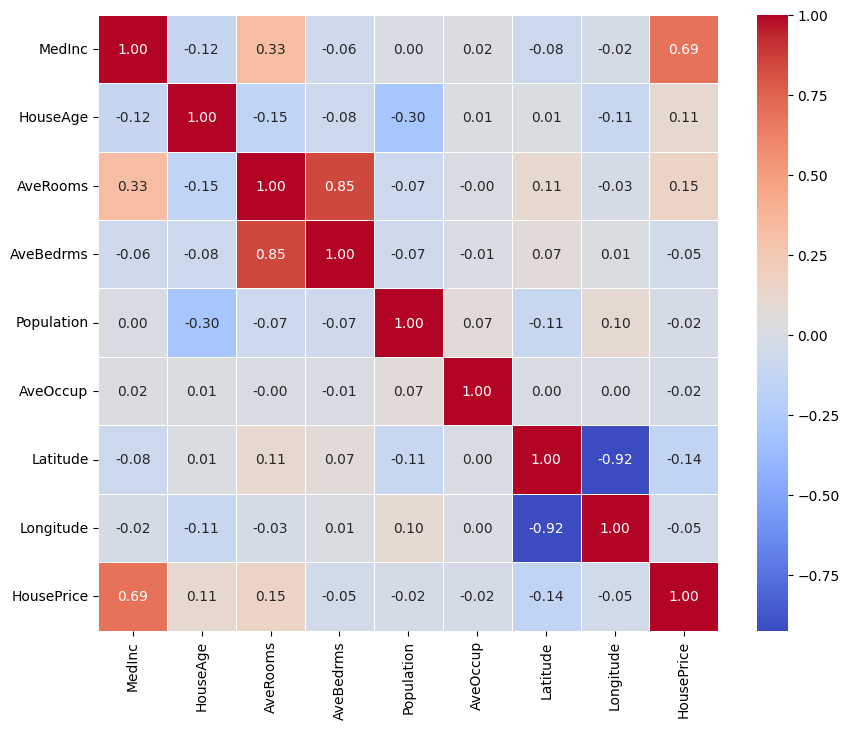

In [22]:
corr = housing_df.corr()
plt.figure(figsize=(10, 8))

#Create a heatmap
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt=".2f",linewidths=0.5)

## Задание: обучить регрессию на приведённых данных